In [28]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge,Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pickle



In [29]:
# Reading in the data

train = pd.read_csv('./datasets/train_eng.csv')
test = pd.read_csv('./datasets/test_eng.csv')

 - After long trial and error, following are the features I removed from my variables list. Removal was based on correlation to 'SalePrice', correlation with other features and distribution of values.
 - Below is a table of the finalized features being used.
 
 | Column 1 | Column 2 | Column 3 | Column 4 | Column 5 | Column 6 | Column 7 | Column 8 |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| "Lot Area" | "Overall Qual" | "Gr Liv Area" | "Full Bath" | "Bedroom AbvGr" | "Kitchen Qual" | "Age" | "Location" |
| "RoadRail" | "Exter Overall" | "Bsmt Overall" | "Garage Overall" | "Kitchen Overall" | "Fireplace Overall" | "Bath AbvGrd" | "Multi Bsmt Type" |
| "Total FinBsmt SF" | ------ | ------ | ------ | ------ | ------ | ------ | ------ |

In [30]:
#Baseline features

features = [col for col in train.select_dtypes(exclude=['object']).columns if col != 'SalePrice' ]

# Removed before Poly
features.remove('Id')
features.remove('PID')
features.remove('MS SubClass')
features.remove('Alley')
features.remove('BsmtFin Type 2')
features.remove('Garage Type')
features.remove('Garage Finish')
features.remove('Garage Cars')
features.remove('Fence')
features.remove('Misc Feature')
features.remove('Misc Val')
features.remove('Mo Sold')
features.remove('Yr Sold')
features.remove('Year Built')
features.remove('Year Remod/Add')
features.remove('Functional')
features.remove('Pool Area')
features.remove('Pool QC')
features.remove('3Ssn Porch')
features.remove('Bsmt Half Bath')
features.remove('Garage Yr Blt')
features.remove('Garage Qual')
features.remove('Exter Cond')
features.remove('Bsmt Cond')
features.remove('Amenities')
features.remove('Garage')
features.remove('Kitchen AbvGr')
features.remove('Pool Overall')
features.remove('Central Air')

# Not Removed before Poly
features.remove('Mas Vnr Area')
features.remove('TotRms AbvGrd')
features.remove('Garage Area')
features.remove('Total Bsmt SF')
features.remove('Overall Cond')
features.remove('Bsmt Unf SF')
features.remove('Bsmt Full Bath')
features.remove('Half Bath')
features.remove('Fireplace Qu')
features.remove('Bsmt Qual')
features.remove('Garage Cond')
features.remove('Exter Qual')
features.remove('Low Qual Fin SF')
features.remove('BsmtFin SF 2')
features.remove('1st Flr SF')
features.remove('2nd Flr SF')
features.remove('Bsmt Exposure')
features.remove('BsmtFin Type 1')
features.remove('BsmtFin SF 1')

# Removed for Poly
features.remove('Wood Deck SF')
features.remove('Open Porch SF')
features.remove('Enclosed Porch')
features.remove('Screen Porch')
features.remove('Heating QC')
features.remove('Lot Frontage')
features.remove('Fireplaces')

X = train[features]
y = train['SalePrice']

In [31]:
# Splitting the training data into it's own train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [32]:
poly = PolynomialFeatures(include_bias = False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
# Scaling the data, considering we'll be using regularization later and certain variables need it

ss = StandardScaler()

Z_train = ss.fit_transform(X_train_poly)
Z_test = ss.transform(X_test_poly)

## OLS Regression

In [34]:
# Cross evaluation score (baseline) of a linear regression model with the data

lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train_poly, y_train, cv=5)
print(lr_scores.mean(), lr_scores.std())

0.8810382976931358 0.017462237210412686


In [35]:
lr.fit(Z_train, y_train)
print("Training OLS score:", lr.score(Z_train, y_train))
print("Testing OLS score:", lr.score(Z_test, y_test))

Training OLS score: 0.9271385894097384
Testing OLS score: 0.9063808984976058


## Ridge Regression/Tuning

In [36]:
# Initial ridge modeling before tuning

ridge_model = Ridge(alpha=10)
ridge_model.fit(Z_train, y_train)
print("Training Ridge score:", ridge_model.score(Z_train, y_train))
print("Testing Ridge score:", ridge_model.score(Z_test, y_test))

Training Ridge score: 0.9237391396662532
Testing Ridge score: 0.9106018940423913


In [37]:
# Creating list of alphas to pass into RidgeCV
r_alpha = np.logspace(0,5,100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alpha, scoring = 'r2', cv = 5)

# Fit model using best ridge alpha
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [38]:
# Ridge alpha used

ridge_cv.alpha_

29.150530628251758

In [39]:
# Scores with the alpha used

print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.9203228183715197
0.9111014858785731


## Lasso Regression/Tuning

In [40]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(1,10,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas, max_iter=500000, n_jobs = -1)

# Fit model using best lasso alpha
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02,
       1.23284674e+02, 1.51991108e+02, 1.87381742e+02, 2.31012970e+02,
       2.84803587e+02, 3.51119173e+02, 4.32876128e+02, 5.33669923e+02,
       6.57933225e+02, 8.11130831e+0...
       8.11130831e+07, 1.00000000e+08, 1.23284674e+08, 1.51991108e+08,
       1.87381742e+08, 2.31012970e+08, 2.84803587e+08, 3.51119173e+08,
       4.32876128e+08, 5.33669923e+08, 6.57933225e+08, 8.11130831e+08,
       1.00000000e+09, 1.23284674e+09, 1.51991108e+09, 1.87381742e+09,
       2.31012970e+09, 2.84803587e+09, 3.51119173e+09, 4.32876128e+09,
       5.33669923e+09, 6.57933225e+09, 8.11130831e+09, 1.00000000e+10]),
        max_iter=500000, n_jobs=-1)

In [41]:
# Best lasso alpha used

lasso_cv.alpha_

231.01297000831605

In [42]:
# list(zip(poly.get_feature_names(X.columns),lasso_cv.coef_))
# Used the above code to find features that the model dropped and kept. Features that were used were put in a better readable format.

used_coefs = {'Garage Overall': 2428.711503437932, 
              'Kitchen Overall': -357.81073452646314,
              'Lot Area^2': -11891.397392790383,
              'Lot Area Overall Qual': 3580.675601239084,
              'Lot Area Location': 3425.412455130229,
              'Lot Area Bsmt Overall': 5616.677636409047,
              'Lot Area Garage Overall': 5729.073846379991,
              'Lot Area Fireplace Overall': 2661.437611857443,
              'Lot Area Multi Bsmt Type': -1726.4040386474815,
              'Overall Qual^2': 11352.70759438348,
              'Overall Qual Gr Liv Area': 18891.89630576948,
              'Overall Qual Full Bath': 1483.3543665967493,
              'Overall Qual Age': -7021.798554063225,
              'Overall Qual Exter Overall': 870.9711563411812,
              'Overall Qual Fireplace Overall': 1896.3222011531482,
              'Overall Qual Total FinBsmt SF': 14131.759166310796,
              'Gr Liv Area Full Bath': 1186.5512596263136,
              'Gr Liv Area Kitchen Qual': 16726.472155359184,
              'Gr Liv Area Age': -14989.193022449062,
              'Gr Liv Area RoadRail': -79.45162921747104,
              'Gr Liv Area Exter Overall': 2696.1046785376543,
              'Gr Liv Area Bsmt Overall': 9401.419072324052,
              'Gr Liv Area Fireplace Overall': 968.2175703852721,
              'Gr Liv Area Bath AbvGrd': 1.3457678282969108,
              'Full Bath Age': -139.1604102179972,
              'Full Bath Location': 998.7404004912345,
              'Full Bath Multi Bsmt Type': -1060.4003740722726,
              'Bedroom AbvGr Kitchen Qual': -1345.264743065486,
              'Bedroom AbvGr Age': 6863.732197687589,
              'Bedroom AbvGr Total FinBsmt SF': -3979.916583507336,
              'Kitchen Qual Age': -133.24247710618363,
              'Kitchen Qual Total FinBsmt SF': 438.17134470790927,
              'Age^2': 11293.478781770564,
              'Age RoadRail': 371.9524416627714,
              'Age Bsmt Overall': -1850.3362239117444,
              'Age Garage Overall': 336.23745563123515,
              'Age Kitchen Overall': -556.5169429554389,
              'Age Multi Bsmt Type': 1086.2977842111925,
              'Location RoadRail': -3126.3611841050315,
              'Location Fireplace Overall': 2251.999268763059,
              'Location Bath AbvGrd': -1714.2838366638418,
              'RoadRail Fireplace Overall': -14.161782904893522,
              'RoadRail Multi Bsmt Type': 594.7272972431879,
              'RoadRail Total FinBsmt SF': -1279.4675850719375,
              'Garage Overall Bath AbvGrd': -1277.7328055349356,
              'Garage Overall Multi Bsmt Type': 279.9277262405082,
              'Fireplace Overall Bath AbvGrd': 273.04298339267314,
              'Fireplace Overall Multi Bsmt Type': -1661.905230010164,
              'Bath AbvGrd Multi Bsmt Type': -186.159303726823,
              'Bath AbvGrd Total FinBsmt SF': 832.5166032753252,
              'Multi Bsmt Type Total FinBsmt SF': 947.59597189456,
              'Total FinBsmt SF^2': 5057.901970925152}

print(len(used_coefs))

52


In [43]:
lasso_coefs = pd.Series(used_coefs)
lasso_coefs.sort_values()

Gr Liv Area Age                     -14989.193022
Lot Area^2                          -11891.397393
Overall Qual Age                     -7021.798554
Bedroom AbvGr Total FinBsmt SF       -3979.916584
Location RoadRail                    -3126.361184
Age Bsmt Overall                     -1850.336224
Lot Area Multi Bsmt Type             -1726.404039
Location Bath AbvGrd                 -1714.283837
Fireplace Overall Multi Bsmt Type    -1661.905230
Bedroom AbvGr Kitchen Qual           -1345.264743
RoadRail Total FinBsmt SF            -1279.467585
Garage Overall Bath AbvGrd           -1277.732806
Full Bath Multi Bsmt Type            -1060.400374
Age Kitchen Overall                   -556.516943
Kitchen Overall                       -357.810735
Bath AbvGrd Multi Bsmt Type           -186.159304
Full Bath Age                         -139.160410
Kitchen Qual Age                      -133.242477
Gr Liv Area RoadRail                   -79.451629
RoadRail Fireplace Overall             -14.161783


In [44]:
#Scores with the features and alpha used

print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.9135693912018229
0.9074767771683402


## Model Tuning Summary

In [45]:
print(" OLS ".center(18, "="))
print(lr.score(Z_train, y_train))
print(lr.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
print()
print(" Lasso ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

====== OLS =======
0.9271385894097384
0.9063808984976058

===== Ridge ======
0.9203228183715197
0.9111014858785731

===== Lasso ======
0.9135693912018229
0.9074767771683402


In [46]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Lasso_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lasso_cv, file)

## Tuning EDA

<AxesSubplot:>

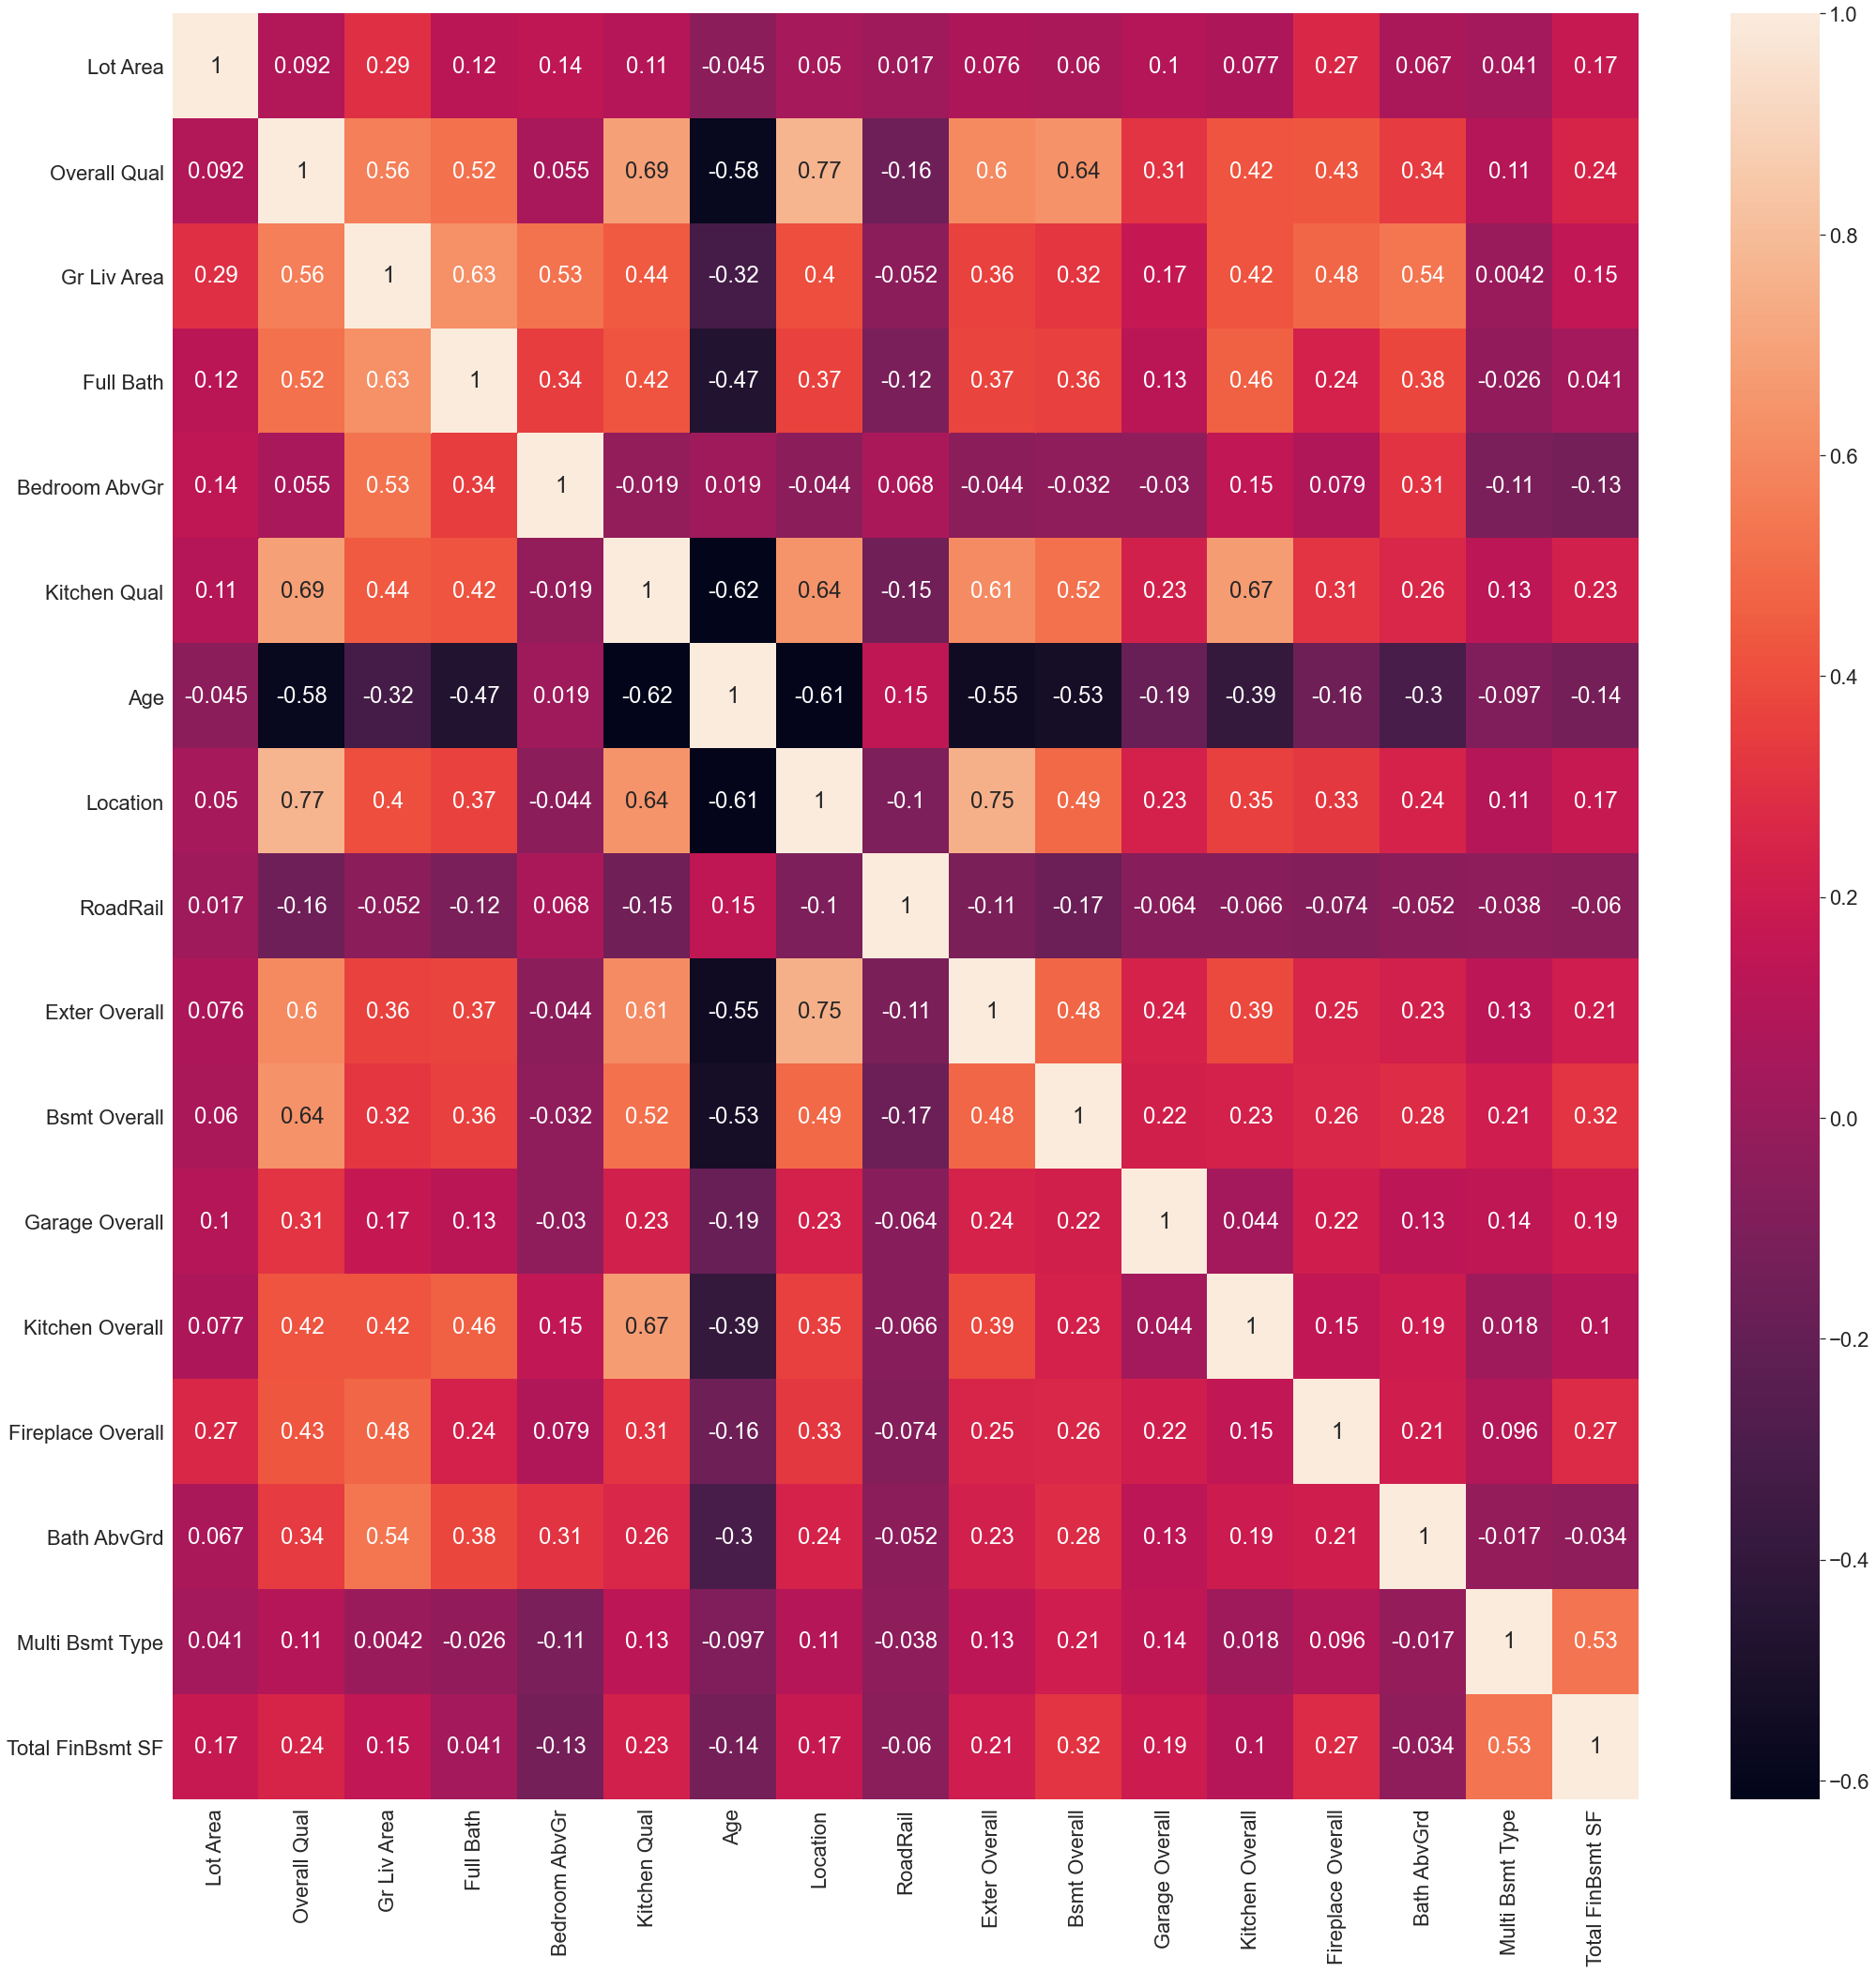

In [47]:
plt.figure(figsize=(35,35))
sns.heatmap(train[features].corr(), annot=True)

<AxesSubplot:>

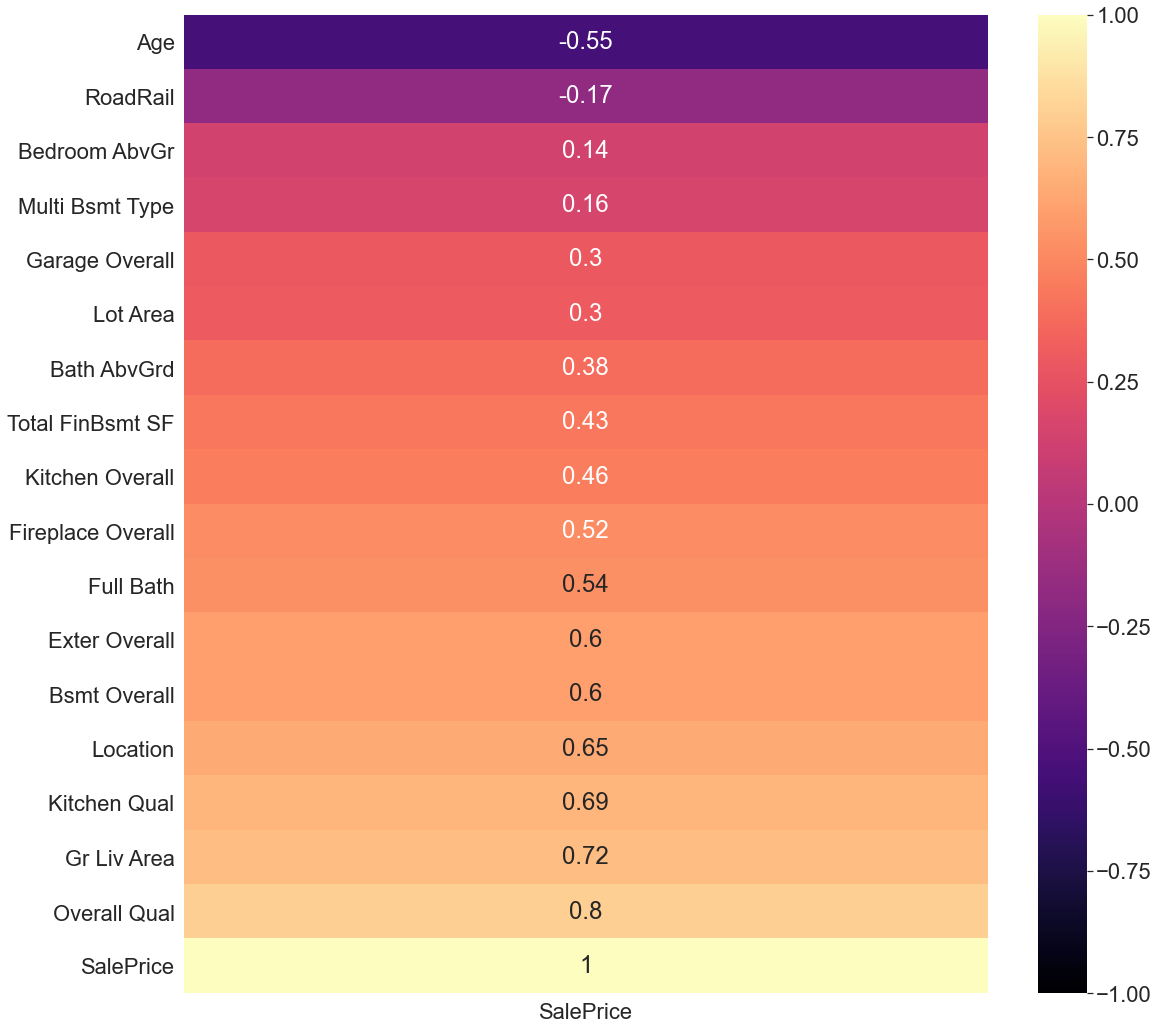

In [48]:
# Heatmap of raw training data correlation with target variable
train_corr = pd.concat([train[features],train['SalePrice']], axis = 1)

correlation = train_corr.corr()[['SalePrice']].sort_values('SalePrice')
sns.set(rc = {'figure.figsize':(18,18)}, font_scale = 2)
sns.heatmap(data = correlation,
    vmin= -1,
    vmax= 1,
    cmap= 'magma',
    annot=True,
)

## Function for QoF Tuning

In [23]:
def print_column_table(dataframe, columns):
    """Function created so I could have an easy to access markdown table of features
    Fully scales to properly format to any column length"""
    # variables
    n_rows = int(np.ceil(len(dataframe.columns) / columns)) # Number of rows to form. Cast Int.
    
    #Print header. Note 7 + length of i is to line up |'s
    print("| " + " | ".join([f"Column {i + 1}" for i in range(columns)]) + " |")
    print("| " + " | ".join(["-" * (7 + len(str(i + 1))) for i in range(columns)]) + " |")
    
    # itterate n number of rows
    for n in range(n_rows):
        #create a list of n columns with "------"
        row = ["------" for _ in range(columns)]
        for i in range(columns):
            # Determine starting index in df.columns for the row
            row_start = n * columns
            try:
                row[i] = f'"{dataframe.columns[row_start + i]}"'
            except:
                pass #Typically bad form but I only want this to avoid an error printing
        #Print row n
        print("| " + " | ".join(row) + " |")

In [24]:
print_column_table(train[features], 8)

| Column 1 | Column 2 | Column 3 | Column 4 | Column 5 | Column 6 | Column 7 | Column 8 |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| "Lot Area" | "Overall Qual" | "Gr Liv Area" | "Full Bath" | "Bedroom AbvGr" | "Kitchen Qual" | "Age" | "Location" |
| "RoadRail" | "Exter Overall" | "Bsmt Overall" | "Garage Overall" | "Kitchen Overall" | "Fireplace Overall" | "Bath AbvGrd" | "Multi Bsmt Type" |
| "Total FinBsmt SF" | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
